In [1]:
import kotext
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import ko_text

In [2]:
raw1 = pd.read_csv('data/Clien_myhome_text_and_datgle_16370.csv', encoding = 'cp949')
raw2 = pd.read_csv('data/Clien_myhome_text_and_datgle_23443.csv', encoding = 'cp949')

raw = pd.concat([raw1,raw2], axis = 0, copy = False)

In [3]:
raw.head()

,A
0,정부의 9·13대책 후 약 한 달이 지난 서울 등 수도권 부동산 시장은 8월까지 치...
1,9.13 대책 이전 수지 구입하고 9.13 대책 이후 분당 구입하면 둘다 전세로 돌...
2,안녕하세요. 8월초 지금 거주중인 아파트 단지내에서 27 -> 32평으로 갈아타기를...
3,실거주 목적이 우선이고요 장기적으로 투자도 된다면 좋습니다. 와이프와 둘이만 지내...
4,매수 9억에 가능 전세보증금 3억 3천있고 대출승계 2억 6천가능 집은 94년 ...


In [4]:
text_ls = list(raw['A'])

remove_word_ls = ['정도','경우','때문','그냥','정말','일단','한번','계속','진짜','무조건','그게','조금','다른','현재','지금',
                 '요즘','원래','다시','만약','하나요','별로','혹시','대한','지난주','내일','어제','과연','아예','미리','보고','가장']

clean_ls = kotext.remove_words(remove_word_ls, text_ls)

In [6]:
nouns = kotext.extract_nouns(clean_ls)

총 단어 수 : 610775
중복을 제거한 단어의 수 : 20563


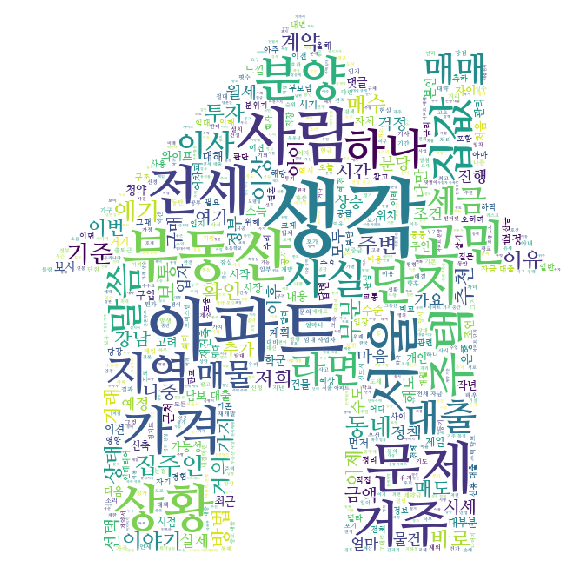

In [7]:
kotext.make_word_cloud(nouns,
                       figsize = (15,10),
                       fontsize = 100,
                       image_path = 'house.jpg')

# Embedding

In [8]:
preprocessed_ls = kotext.preprocessing_for_embedding(clean_ls)


In [27]:
' '.join(preprocessed_ls[0])

'정부 대책 달이 지난 서울 수도권 부동산 시장 가격 호가 거래 가격 모두 슬금슬금 분위기 유세 부담 매물 하나 가운데 집값 관망 심리 매도 일부 호가 입장 수자 바겐 보지 상황 호가 거품 예상 신문 서울 주요 지역 부동산 취재 결과 국내 부동산 시장 흐름 지표 강남 구의 일부 단지 매물 호가 거래 가가 조정 서초구 반포동 김시연 래미안 공인 대표 서경 매물 수준 경제 물건 위주 하나 하나 매물 면서 기존 재건축 위주 거품 설명 단지 대치동 은마 아파트 전용 최근 호가 형성 인근 중개업 단지 지난달 호가 수준 거래 국토교통부 거래 신고 기준 거래 지난달 호가 거래 모두 이상 송파구 잠실동 잠실 단지 전용 호가 가량 중반 해도 고가 매물 단지 급매 물건 거래 기도 인근 공인 대표 단지 주인 사정 급매 계약 평균 호가 크게 하진 강남구 개포동 개포 단지 전용 호가 가량 고재 씨티 공인 대표 서경 단지 최근 계약 최고 지난달 중순 마지막 거래 일부 단지 호가 거래 가가 조정 집값 하락 전초전 시각 집주인 호가 과열 부동산 시장 거품 현장 시각 김시연 대표 매도 시기 아야 걱정 면서 래미안 퍼스 전용 거래 호가 형성 중인 만큼 전반 호가 보기 송파구 잠실동 중개업 대표 잠실 엘스 아파트 전용 초반 급매 평균 호가 상태 지속 강북 급매 물건 마포구 대장 주인 마포 래미안 푸르지오 최근 평균 호가 매물 인근 중개업 대표 최근 물건 워낙 매물 급매 거래 용산구 산천 동의 리버 삼성 전용 매물 전용 통틀어 물건 하나 호가 수준 급매 물건 남향 고층 감안 편이'

In [9]:
from gensim.models import Word2Vec

In [78]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [79]:
w2v = Word2Vec(min_count = 3,
               window = 5,
               sg = 1,
               hs = 1,
               iter = 30,
               size = 100,
               sample = 1e-05)

In [80]:
w2v.build_vocab(preprocessed_ls)

2018-12-07 19:17:56,818 : INFO : collecting all words and their counts
2018-12-07 19:17:56,821 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-07 19:17:56,889 : INFO : collected 12000 word types from a corpus of 207399 raw words and 3938 sentences
2018-12-07 19:17:56,890 : INFO : Loading a fresh vocabulary
2018-12-07 19:17:56,909 : INFO : effective_min_count=3 retains 5597 unique words (46% of original 12000, drops 6403)
2018-12-07 19:17:56,910 : INFO : effective_min_count=3 leaves 199268 word corpus (96% of original 207399, drops 8131)
2018-12-07 19:17:56,938 : INFO : deleting the raw counts dictionary of 12000 items
2018-12-07 19:17:56,939 : INFO : sample=1e-05 downsamples 3617 most-common words
2018-12-07 19:17:56,939 : INFO : downsampling leaves estimated 43546 word corpus (21.9% of prior 199268)
2018-12-07 19:17:56,952 : INFO : constructing a huffman tree from 5597 words
2018-12-07 19:17:57,259 : INFO : built huffman tree with maximum node depth 

In [81]:
w2v.train(preprocessed_ls, 
          total_examples = w2v.corpus_count,
          epochs = 30)

2018-12-07 19:17:58,846 : INFO : training model with 3 workers on 5597 vocabulary and 100 features, using sg=1 hs=1 sample=1e-05 negative=5 window=5
2018-12-07 19:17:59,077 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-07 19:17:59,079 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-07 19:17:59,092 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-07 19:17:59,092 : INFO : EPOCH - 1 : training on 207399 raw words (43622 effective words) took 0.2s, 180517 effective words/s
2018-12-07 19:17:59,327 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-07 19:17:59,327 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-07 19:17:59,333 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-07 19:17:59,334 : INFO : EPOCH - 2 : training on 207399 raw words (43491 effective words) took 0.2s, 182645 effective words/s
2018-12-07 19:17:59,555 : INFO : work

(1307514, 6221970)

In [83]:
w2v.wv.similar_by_word('아파트')

[('신축', 0.7137488126754761),
 ('서울', 0.7015830278396606),
 ('지역', 0.6825016736984253),
 ('단지', 0.6772520542144775),
 ('평수', 0.6672999858856201),
 ('입지', 0.6665753126144409),
 ('위치', 0.6641799211502075),
 ('가격', 0.6631054282188416),
 ('관악', 0.6509823799133301),
 ('대의', 0.649286150932312)]

In [106]:
w2v.wv.similar_by_word('고민')

[('아이', 0.7820514440536499),
 ('선택', 0.7651203870773315),
 ('마음', 0.7587593793869019),
 ('추천', 0.758305549621582),
 ('내집마련', 0.7547874450683594),
 ('회사', 0.7429373264312744),
 ('평이', 0.7398676872253418),
 ('조언', 0.7383147478103638),
 ('와이프', 0.7344517707824707),
 ('직장', 0.729285478591919)]

In [108]:
w2v.wv.similar_by_word('아이')

[('초등학교', 0.8414116501808167),
 ('입학', 0.8316637873649597),
 ('유치원', 0.8286429643630981),
 ('학교', 0.8137606978416443),
 ('출퇴근', 0.8045580387115479),
 ('직장', 0.7901294231414795),
 ('고민', 0.7820515036582947),
 ('근처', 0.7794269323348999),
 ('초등', 0.7785795331001282),
 ('중고', 0.7746878862380981)]

In [111]:
w2v.wv.similar_by_word('결혼')

[('신혼집', 0.8118488788604736),
 ('부모님', 0.8009282350540161),
 ('나이', 0.8005411624908447),
 ('맞벌이', 0.7923893928527832),
 ('와이프', 0.7773223519325256),
 ('부부', 0.7773032188415527),
 ('재테크', 0.7662243843078613),
 ('직장', 0.7601152062416077),
 ('싱글', 0.759265124797821),
 ('양가', 0.750365138053894)]

In [86]:
w2v.wv.similar_by_word('상가')

[('건물', 0.7186253070831299),
 ('단독주택', 0.6173853874206543),
 ('대지', 0.6167883276939392),
 ('용도', 0.6096369028091431),
 ('도로', 0.6080359220504761),
 ('조감도', 0.5885341167449951),
 ('반발', 0.5827697515487671),
 ('임대차보호법', 0.5823139548301697),
 ('개층', 0.5821618437767029),
 ('보강', 0.573233962059021)]

In [97]:
w2v.wv.similar_by_word('원룸')

[('취업', 0.7057480812072754),
 ('버팀목', 0.6875255107879639),
 ('관념', 0.6780252456665039),
 ('이구', 0.6528947353363037),
 ('초년', 0.6517450213432312),
 ('학자금', 0.6496782302856445),
 ('연봉', 0.6482661366462708),
 ('월세', 0.6347444653511047),
 ('이직', 0.6331559419631958),
 ('복직', 0.6321470141410828)]

In [98]:
w2v.wv.similar_by_word('정부')

[('정책', 0.8668712377548218),
 ('규제', 0.8496500253677368),
 ('대책', 0.8441084623336792),
 ('강도', 0.8345928192138672),
 ('시장', 0.8198925852775574),
 ('유세', 0.8171167373657227),
 ('유도', 0.8116944432258606),
 ('수요', 0.8047062754631042),
 ('예고', 0.8030949831008911),
 ('논란', 0.8000288009643555)]

In [100]:
w2v.wv.similar_by_word('월세')

[('보증금', 0.73955237865448),
 ('전세', 0.7206178307533264),
 ('현금', 0.7182856798171997),
 ('자금', 0.7164647579193115),
 ('목돈', 0.6951795816421509),
 ('생각', 0.6842695474624634),
 ('세금', 0.6815754771232605),
 ('구해', 0.6814650297164917),
 ('입자', 0.6620084047317505),
 ('걱정', 0.6516708135604858)]

In [101]:
w2v.wv.similar_by_word('전세')

[('매매', 0.8430531620979309),
 ('만기', 0.8377622961997986),
 ('상황', 0.7912805080413818),
 ('자금', 0.7723537087440491),
 ('전세계약', 0.7667207717895508),
 ('구해', 0.7627270221710205),
 ('상태', 0.7481634020805359),
 ('버팀목', 0.7463803291320801),
 ('입자', 0.7411311268806458),
 ('보증금', 0.7379695177078247)]

In [104]:
w2v.wv.similar_by_word('디딤돌')

[('보금자리', 0.8457775712013245),
 ('실행', 0.8331485986709595),
 ('대출', 0.8306182026863098),
 ('한도', 0.8189665079116821),
 ('신용', 0.8146922588348389),
 ('생애', 0.8133409023284912),
 ('신청', 0.7985888123512268),
 ('버팀목', 0.7908639311790466),
 ('디딤돌대출', 0.7829275131225586),
 ('담보', 0.7774989008903503)]

In [85]:
w2v.wv.similar_by_word('집값')

[('폭등', 0.7855542898178101),
 ('투자자', 0.7748888731002808),
 ('상승', 0.7715965509414673),
 ('심리', 0.7623267769813538),
 ('급등', 0.7612547278404236),
 ('관망', 0.7577906847000122),
 ('현상', 0.7523680329322815),
 ('서울', 0.7520821690559387),
 ('가능성', 0.7410920858383179),
 ('정책', 0.734108567237854)]

In [ ]:
kotext.make_embedding_plot(model = model, model_name = '300features_200minwords_10context')

# TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
title_1 = pd.read_csv('data/Clien_myhome_title_and_date_1323.csv', encoding = 'cp949')
title_2 = pd.read_csv('data/Clien_myhome_title_and_date_2615.csv', encoding = 'cp949')

title_df = pd.concat([title_1, title_2], axis=0 , copy = False)

In [52]:
print(len(title_df))
title_df.head()

3938


,date,title,text
0,2018-10-10,[9.13 부동산대책 한달] 서울 아파트 호가·실거래 최고 1억 '뚝'...'거품 ...,정부의 9·13대책 후 약 한 달이 지난 서울 등 수도권 부동산 시장은 8월까지 치...
1,2018-10-10,1가구 2주택 문의,9.13 대책 이전 수지 구입하고 9.13 대책 이후 분당 구입하면 둘다 전세로 돌...
2,2018-10-10,[문의] 부동산 중개 수수료 관련...,안녕하세요. 8월초 지금 거주중인 아파트 단지내에서 27 -> 32평으로 갈아타기를...
3,2018-10-10,수원 매탄 위브하늘채 or 이편한세상 어떤가요?,실거주 목적이 우선이고요 장기적으로 투자도 된다면 좋습니다. 와이프와 둘이만 지내...
4,2018-10-10,서울 양평동 9억 상가주택,매수 9억에 가능 전세보증금 3억 3천있고 대출승계 2억 6천가능 집은 94년 ...


# Preprocessing

In [70]:
text_only_ls = list(title_df['text'])

remove_word_ls = ['정도','경우','때문','그냥','정말','일단','한번','계속','진짜','무조건','그게','조금','다른','현재','지금',
                 '요즘','원래','다시','만약','하나요','별로','혹시','대한','지난주','내일','어제','과연','아예','미리','보고','가장',
                 '기존','오늘','크게','거의','올해','사실','해당','전혀','이제','대해','주변','바로','모두','하나', '가가']

clean_ls = kotext.remove_words(remove_word_ls, text_only_ls)

preprocessed_ls = kotext.preprocessing_for_embedding(clean_ls)
corpus_for_tf_idf_ls = [' '.join(x) for x in preprocessed_ls]

# TF-IDF Vectorizing

In [71]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf_vectorizer = TfidfVectorizer(min_df = 50).fit(corpus_for_tf_idf_ls)
tfidf_array = tfidf_vectorizer.transform(clean_ls).toarray()

vocab = tfidf_vectorizer.get_feature_names()

tfidf_df = pd.DataFrame(tfidf_array, columns = vocab)

In [73]:
print(tfidf_df.shape)
tfidf_df.head()

(3938, 628)


,가게,가격,가계약,가구,가까이,가능,가능성,가량,가면,가야,...,확인,확장,확정,환경,활용,회사,회원,효과,흐름,희망
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.18671,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.604653,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
keyword_ls = tfidf_df.idxmax(axis=1)

Counter(keyword_ls).most_common(20)

[('가게', 233),
 ('재건축', 55),
 ('전세', 53),
 ('아파트', 48),
 ('디딤돌', 44),
 ('부동산', 38),
 ('인테리어', 37),
 ('서울', 34),
 ('청약', 31),
 ('대출', 26),
 ('내년', 25),
 ('재개발', 23),
 ('안방', 23),
 ('보통', 23),
 ('제일', 20),
 ('오피스텔', 20),
 ('계약금', 20),
 ('네이버', 20),
 ('갑자기', 20),
 ('당분간', 20)]